In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
%matplotlib inline


In [2]:
bank = pd.read_csv("../csv/bank.csv",delimiter=";")

In [3]:
bank_df=bank.copy()

In [4]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [5]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
bank_df.describe(include="O")

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,yes,no,cellular,may,unknown,no
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,4000


In [8]:
bank_df.shape

(4521, 17)

In [9]:
bank_df["y"].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [10]:
bank_df.rename(columns={"y":"subscribed"}, inplace=True)

In [11]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [12]:
#Distribution in Percentage
round(bank_df["subscribed"].value_counts(normalize=True)*100,2)

no     88.48
yes    11.52
Name: subscribed, dtype: float64

<AxesSubplot:xlabel='subscribed', ylabel='count'>

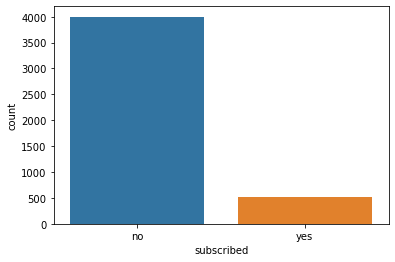

In [13]:
sns.countplot(x="subscribed", data=bank_df)

<AxesSubplot:xlabel='subscribed', ylabel='balance'>

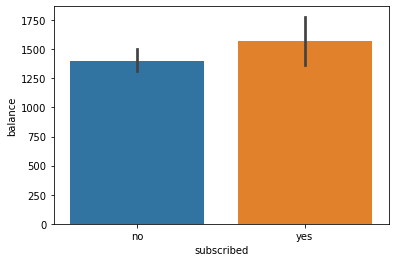

In [14]:
sns.barplot(x='subscribed', y='balance', data=bank_df)

<AxesSubplot:xlabel='previous', ylabel='count'>

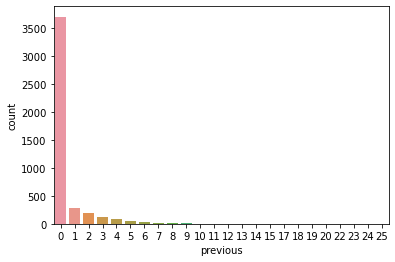

In [15]:
sns.countplot(x="previous", data=bank_df)

<AxesSubplot:xlabel='subscribed', ylabel='previous'>

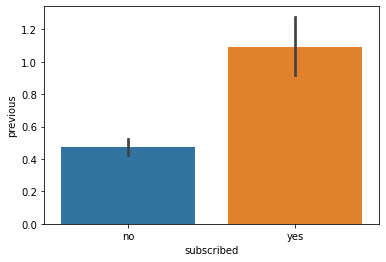

In [16]:
sns.barplot(x='subscribed', y='previous', data=bank_df)

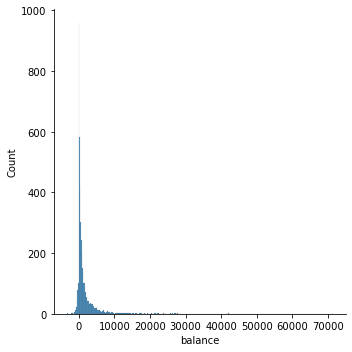

In [17]:
sns.displot(bank_df["balance"])

In [18]:
#Dependent Columns
X_features = list(bank_df.columns)
X_features.remove("subscribed")
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [19]:
encoded_bank_df=pd.get_dummies(bank_df[X_features],drop_first=True)

In [20]:
#Conver dependent variable to 0 or 1
Y=bank_df.subscribed.map(lambda x:int(x=="yes"))

In [21]:
X = encoded_bank_df

In [22]:
X

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4517,57,-3313,9,153,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4518,57,295,19,151,11,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4519,28,1137,6,129,4,211,3,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
#Logistic Regression
logit_model=sm.Logit(Y,sm.add_constant(X)).fit()

Optimization terminated successfully.
         Current function value: 0.240395
         Iterations 8


In [24]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:               Logit            Pseudo R-squared: 0.327      
Dependent Variable:  subscribed       AIC:              2259.6513  
Date:                2022-03-01 13:52 BIC:              2535.5603  
No. Observations:    4521             Log-Likelihood:   -1086.8    
Df Model:            42               LL-Null:          -1615.5    
Df Residuals:        4478             LLR p-value:      3.1186e-194
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      8.0000                                        
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const               -2.4618   0.6038 -4.0774 0.0000 -3.6452 -1.2785
age                 -0.0042   0.0071 -0.5940 0.5525 -0.0182  0.0097
balance             -0.0000   0.0000 -0.2237 0.8230 -0.0000  0.0000
day                  0.0164   0.0082  2.0106 0.0444  0.0004  0.0324
duration             0.0042   0.0002 20.9119 0.0000  0.0038  0.0046
campaign            -0.0704   0.0282 -2.4963 0.0126 -0.1257 -0.0151
pdays               -0.0001   0.0010 -0.0983 0.9217 -0.0020  0.0019
previous            -0.0055   0.0382 -0.1443 0.8852 -0.0804  0.0693
job_blue-collar     -0.3924   0.2420 -1.6214 0.1049 -0.8668  0.0820
job_entrepreneur    -0.2498   0.3811 -0.6554 0.5122 -0.9966  0.4971
job_housemaid       -0.3530   0.4176 -0.8452 0.3980 -1.1715  0.4656
job_management      -0.0730   0.2407 -0.3034 0.7616 -0.5447  0.3987
job_retired          0.6315   0.3112  2.0290 0.0425  0.0215  1.2415
job_self-employed   -0.1812   0.3533 -0.5127 0.6082 -0.8737  0.5114
job_services        -0.1457   0.2729 -0.5337 0.5935 -0.6806  0.3893
job_student          0.3784   0.3750  1.0090 0.3130 -0.3566  1.1135
job_technician      -0.1926   0.2301 -0.8372 0.4025 -0.6437  0.2584
job_unemployed      -0.6395   0.4214 -1.5175 0.1291 -1.4656  0.1865
job_unknown          0.5207   0.5853  0.8896 0.3737 -0.6264  1.6677
marital_married     -0.4696   0.1743 -2.6941 0.0071 -0.8112 -0.1280
marital_single      -0.3051   0.2038 -1.4971 0.1344 -0.7045  0.0943
education_secondary  0.0801   0.2022  0.3962 0.6919 -0.3161  0.4764
education_tertiary   0.3208   0.2337  1.3725 0.1699 -0.1373  0.7788
education_unknown   -0.4210   0.3572 -1.1786 0.2386 -1.1212  0.2791
default_yes          0.5446   0.4315  1.2623 0.2068 -0.3010  1.3903
housing_yes         -0.2600   0.1381 -1.8832 0.0597 -0.5306  0.0106
loan_yes            -0.6296   0.2000 -3.1486 0.0016 -1.0216 -0.2377
contact_telephone   -0.0702   0.2327 -0.3017 0.7629 -0.5263  0.3859
contact_unknown     -1.4161   0.2277 -6.2192 0.0000 -1.8623 -0.9698
month_aug           -0.3081   0.2494 -1.2355 0.2167 -0.7970  0.1807
month_dec            0.1144   0.6573  0.1741 0.8618 -1.1738  1.4027
month_feb            0.2022   0.2937  0.6883 0.4913 -0.3735  0.7779
month_jan           -1.1233   0.3816 -2.9435 0.0032 -1.8713 -0.3754
month_jul           -0.7515   0.2498 -3.0079 0.0026 -1.2412 -0.2618
month_jun            0.5542   0.3003  1.8452 0.0650 -0.0345  1.1428
month_mar            1.4985   0.3901  3.8417 0.0001  0.7340  2.2630
month_may           -0.4900   0.2340 -2.0942 0.0362 -0.9487 -0.0314
month_nov           -0.8430   0.2737 -3.0797 0.0021 -1.3795 -0.3065
month_oct            1.3610   0.3300  4.1245 0.0000  0.7142  2.0077
month_sep            0.6572   0.4115  1.5970 0.1103 -0.1494  1.4638
poutcome_other       0.4912   0.2692  1.8249 0.0680 -0.0364  1.0188
poutcome_success     2.4449   0.2773  8.8184 0.0000  1.9015  2.9883
poutcome_unknown    -0.1216   0.3199 -0.3802 0.7038 -0.7485  0.5053
===================================================================

"""

In [25]:
#Function to return significant variables. Return only those variables which has ap value less than 0.05
def get_significant_variables(lm):
    var_p_vals_df = pd.DataFrame(lm.pvalues)
    var_p_vals_df["vars"] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list(var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'])
  
                  
    

In [26]:
significant_variables = get_significant_variables(logit_model)

In [27]:
significant_variables 

['const',
 'day',
 'duration',
 'campaign',
 'job_retired',
 'marital_married',
 'loan_yes',
 'contact_unknown',
 'month_jan',
 'month_jul',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'poutcome_success']

In [28]:
X_features = [
 'day',
 'duration',
 'campaign',
 'job_retired',
 'marital_married',
 'loan_yes',
 'contact_unknown',
 'month_jan',
 'month_jul',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct']

In [29]:
logit_model_2 = sm.Logit(Y, sm.add_constant(X[X_features])).fit()

Optimization terminated successfully.
         Current function value: 0.260906
         Iterations 8


In [30]:
logit_model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.270      
Dependent Variable: subscribed       AIC:              2387.1117  
Date:               2022-03-01 13:52 BIC:              2476.9426  
No. Observations:   4521             Log-Likelihood:   -1179.6    
Df Model:           13               LL-Null:          -1615.5    
Df Residuals:       4507             LLR p-value:      5.4322e-178
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     8.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
const             -2.4868   0.1631 -15.2508 0.0000 -2.8064 -2.1672
day                0.0093   0.0073   1.2742 0.2026 -0.0050  0.0235
duration           0.0041   0.0002  21.0894 0.0000  0.0037  0.0045
campaign          -0.1015   0.0276  -3.6832 0.0002 -0.1555 -0.0475
job_retired        0.7169   0.1961   3.6549 0.0003  0.3324  1.1013
marital_married   -0.3615   0.1103  -3.2772 0.0010 -0.5777 -0.1453
loan_yes          -0.6881   0.1907  -3.6079 0.0003 -1.0619 -0.3143
contact_unknown   -1.4577   0.1789  -8.1462 0.0000 -1.8084 -1.1070
month_jan         -0.9360   0.3343  -2.7997 0.0051 -1.5912 -0.2807
month_jul         -0.9364   0.1804  -5.1921 0.0000 -1.2899 -0.5829
month_mar          1.6260   0.3219   5.0519 0.0000  0.9952  2.2569
month_may         -0.7343   0.1520  -4.8304 0.0000 -1.0323 -0.4364
month_nov         -0.9335   0.2158  -4.3261 0.0000 -1.3565 -0.5106
month_oct          1.4579   0.2654   5.4934 0.0000  0.9377  1.9781
==================================================================

"""

In [31]:
y_pred_df = pd.DataFrame({"actual": Y,
                         "predicted_prob": logit_model_2.predict(sm.add_constant(X[X_features]))})

In [32]:
y_pred_df

,actual,predicted_prob
0,0,0.270189
1,0,0.033136
2,0,0.156325
3,0,0.010343
4,0,0.015153
...,...,...
4516,0,0.064591
4517,0,0.005924
4518,0,0.040196
4519,0,0.064596


In [33]:
sorted_predict_df = y_pred_df[["predicted_prob", "actual"]].sort_values("predicted_prob", ascending=False)
sorted_predict_df

,predicted_prob,actual
568,0.999820,0
3673,0.998798,1
4123,0.997244,1
125,0.993658,1
1903,0.992891,0
...,...,...
553,0.000638,0
3125,0.000601,0
1363,0.000403,0
4301,0.000375,0


In [34]:
number_per_decile = int(len(sorted_predict_df)/10)
print("Number of observations per decile: ", number_per_decile)

Number of observations per decile:  452


In [35]:
#function to get the decile. Split the dat in 10 equal parts
def get_decile(df):
    df["decile"] = 1
    idx = 0
    for each_d in range(0,10):
        df.iloc[idx:idx+number_per_decile, df.columns.get_loc('decile')] = each_d
        idx += number_per_decile
    df["decile"] = df["decile"] +1
    return df

In [36]:
deciles_predict_df=get_decile(sorted_predict_df)

In [37]:
deciles_predict_df[0:20]

,predicted_prob,actual,decile
568,0.999820,0,1
3673,0.998798,1,1
4123,0.997244,1,1
125,0.993658,1,1
1903,0.992891,0,1
2827,0.992332,1,1
51,0.989929,0,1
494,0.986486,1,1
2875,0.982635,0,1
3141,0.979862,1,1


In [38]:
gain_lift_df=pd.DataFrame(deciles_predict_df.groupby("decile")["actual"].sum()).reset_index()
gain_lift_df.columns=["decile", 'gain']

In [39]:
gain_lift_df

,decile,gain
0,1,237
1,2,133
2,3,63
3,4,35
4,5,27
5,6,15
6,7,7
7,8,1
8,9,2
9,10,1


In [40]:
gain_lift_df["gain_percentage"] = (100 * gain_lift_df.gain.cumsum()/gain_lift_df.gain.sum())

In [41]:
gain_lift_df

,decile,gain,gain_percentage
0,1,237,45.489443
1,2,133,71.017274
2,3,63,83.109405
3,4,35,89.827255
4,5,27,95.009597
5,6,15,97.888676
6,7,7,99.232246
7,8,1,99.424184
8,9,2,99.808061
9,10,1,100.000000


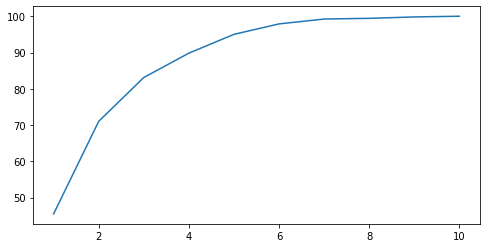

In [42]:
plt.figure(figsize=(8,4))
plt.plot(gain_lift_df["decile"], gain_lift_df["gain_percentage"], "-")
plt.show()

In [43]:
gain_lift_df["lift"] = gain_lift_df.gain_percentage/(gain_lift_df.decile*10)

In [44]:
gain_lift_df

,decile,gain,gain_percentage,lift
0,1,237,45.489443,4.548944
1,2,133,71.017274,3.550864
2,3,63,83.109405,2.770313
3,4,35,89.827255,2.245681
4,5,27,95.009597,1.900192
5,6,15,97.888676,1.631478
6,7,7,99.232246,1.417604
7,8,1,99.424184,1.242802
8,9,2,99.808061,1.108978
9,10,1,100.000000,1.000000


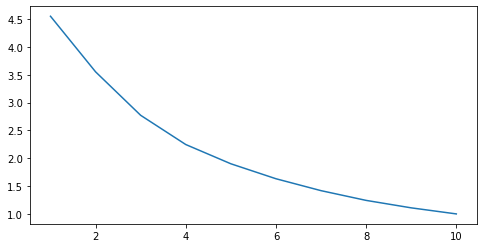

In [45]:
plt.figure(figsize=(8,4))
plt.plot(gain_lift_df["decile"], gain_lift_df["lift"], "-")
plt.show()

In [46]:
#Developing model using Logistic regression sklearn package
logit = LogisticRegression()

In [47]:
logit.fit(X,Y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
pred_y = logit.predict_proba(X)

In [49]:
pred_y

array([[8.53152338e-01, 1.46847662e-01],
       [8.54501929e-01, 1.45498071e-01],
       [8.51663503e-01, 1.48336497e-01],
       ...,
       [9.99113667e-01, 8.86332511e-04],
       [9.29417327e-01, 7.05826726e-02],
       [6.64499770e-01, 3.35500230e-01]])

In [50]:
type(pred_y)

numpy.ndarray

In [51]:
y_pred_df_new = pd.DataFrame({"actual": Y, "predicted_prob":pred_y[:,1]})

In [52]:
y_pred_df_new.head()

,actual,predicted_prob
0,0,0.146848
1,0,0.145498
2,0,0.148336
3,0,0.038516
4,0,0.057071


In [53]:
sorted_predict_df_new = y_pred_df_new[["predicted_prob", 'actual']].sort_values("predicted_prob", ascending=False)

In [54]:
sorted_predict_df_new

,predicted_prob,actual
568,9.993931e-01,0
3673,9.973286e-01,1
4123,9.957326e-01,1
3853,9.881177e-01,1
804,9.854989e-01,0
...,...,...
1363,4.395232e-08,0
3125,3.942109e-08,0
553,3.888038e-08,0
4301,6.885462e-11,0


In [55]:
deciles_predict_df_new = get_decile(sorted_predict_df_new)

In [56]:
deciles_predict_df_new[0:20]

,predicted_prob,actual,decile
568,0.999393,0,1
3673,0.997329,1,1
4123,0.995733,1,1
3853,0.988118,1,1
804,0.985499,0,1
980,0.983971,1,1
2875,0.982009,0,1
3141,0.980311,1,1
429,0.979263,0,1
125,0.974178,1,1
